# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Sep 20 (Thursday) 11:00 pm </b> </font>

<font color="blue"> Josiah Laivins </font>

# Introduction

Climate Change data is always a good category to be familiar with. There are many times where I have had discussions with people and they would tell me that the global temperature increase is not happening, or that it is not correlated with human activity. I think that being able to download data sets of global temperatures and correlate them with human activity would not only be interesting, but also enlightening personally. Since part of this analysis is correlating temperatures with increasing years, I thought this would be excellent for regression. 

# Data

The link this data set can be found [at this Kaggle climate change link](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/home)

Climate change seemed appropriate for regression. 
The main set I was interested in was the Global Temperatures. The data set also has temperatures filtered by City, Country and State. 
The data ranges from years 1750 to around 2015. 

The features in the GlobalTemperatures csv are: 
- 'datetime'
- 'LandAverageTemperature'
- 'LandAverageTemperatureUncertainty'
- 'LandMaxTemperature'
- 'LandMaxTemperatureUncertainty',
- 'LandMinTemperature'
- 'LandMinTemperatureUncertainty',
- 'LandAndOceanAverageTemperature',
- 'LandAndOceanAverageTemperatureUncertainty'

There are 3179 records in this csv, however there are other csv's that have records up to 577462 records such as the GlobalLandTemperaturesByCountry csv. 

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


### Super Classs Definition

In [132]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [143]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        self.w = []
        self.offset = 0
        
    # train lease-squares model
    def train(self, X, T):
        # Goal is yi = b0_hat + b1_hat * xi

        # First we need b1_hat
        Sxx = sum([(x - sum(X) / len(X)) ** 2 for x in X])
        Sxy = sum([(x - sum(X) / len(X)) * (y - sum(T) / len(T)) for x, y in
                   zip(X, T)])

        b1_hat = Sxy / Sxx
        # Then we get b0_hat
        b0_hat = sum(T) / len(T) - b1_hat * (sum(X) / len(X))

#         print(f'Sxx: {Sxx} Sxy: {Sxy}')
#         print(f'b1_hat is: {b1_hat} and b0_hat is {b0_hat}')
        # And so the resulting equation can be
        # y = b0_hat + b1_hat * x where x is the 'time period' and y is the target
        self.w = b1_hat
        self.offset = b0_hat
#         N = X.shape[0]
#         # TODO: code for finding w
#         X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
#         self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T 
    
    # apply the learned model to data X
    def use(self, X):
#         N = X.shape[0]
#         X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
#         return X1 @ self.w 
        return self.offset + self.w * X


### Least Mean Squares

In [134]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha, k=-1, offset=0):
        LinearModel.__init__(self)
        self.alpha = alpha
        self.k = k
        self.w = []
        self.offset = offset
    
    # batch training by using train_step function
    def train(self, X, T):
        for x, t in zip(X, T):
            self.train_step(x, t)
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        N = x.shape[0]
        # TODO: code for finding w
        x = np.hstack((np.ones((N, 1)), x.reshape((x.shape[0], -1))))
        
        if self.k == -1:
            self.k += 1
            self.w = np.array([np.random.rand(x.shape[1])])
        elif self.k != X.shape[0] - 1:
#             self.w.append(0)
            print(str(self.w) + '\n\n' + str(x))
            y = np.transpose(self.w[self.k]) * x
            print('\nY: ' + str(y))
            self.w[self.k+1] = self.w[self.k] - self.alpha * (y - t) * x
            self.k += 1
    
    # apply the current model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        return X1 @ self.w
        

### Usage Examples

In [135]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

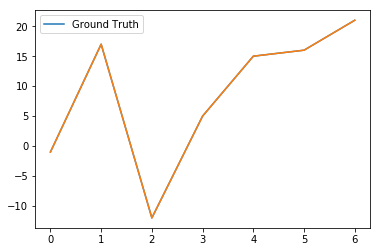

In [136]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2
# X = np.array([[2,5],
#               [6,2],
#               [1,9],
#               [4,5],
#               [6,3],
#               [7,4],
#               [8,3]])
# T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3


ls = LinearRegress()

ls.train(X, T)

plt.plot(T, label='Ground Truth')
plt.legend()
plt.plot(ls.use(X))


In [137]:
import IPython.display as ipd  # for display and clear_output
fig = plt.figure()

lms = LMS(0.02)

print('Targets:'+ str(T) + ' X: ' + str(X))
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.clf()
    plt.plot(lms.use(X))
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True)

plt.plot(T, label='Ground Truth')
plt.legend()


Targets:[[ -1]
 [ 17]
 [-12]
 [  5]
 [ 15]
 [ 16]
 [ 21]] X: [[2 5]
 [6 2]
 [1 9]
 [4 5]
 [6 3]
 [7 4]
 [8 3]]


ValueError: shapes (7,3) and (1,2) not aligned: 3 (dim 1) != 1 (dim 0)

<Figure size 432x288 with 0 Axes>

# Note: How do you to change the 'use' method to return a value that has the same dimensions as the target?

In [ ]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply two methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


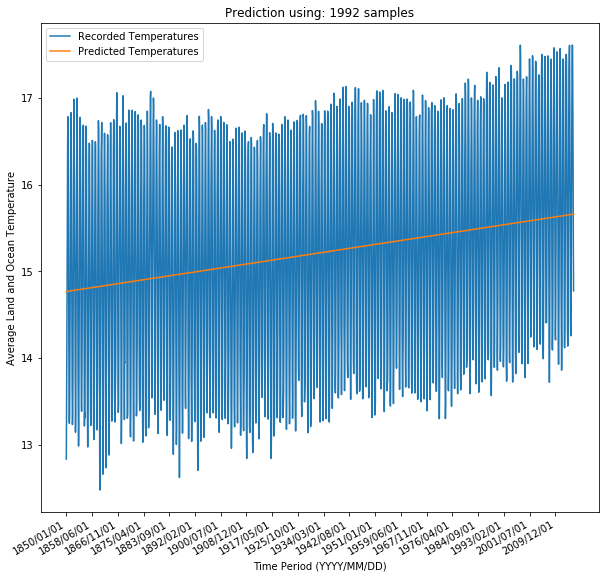

In [145]:
import pandas as pd
nrows = None

# Get Data
data = pd.read_csv('./data/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv', nrows=nrows)
data.dropna(subset=['LandAndOceanAverageTemperature'], inplace=True)
data = data.reset_index(drop=True)
past_dt = list(pd.to_datetime(data['dt']))
xaxis = past_dt
nrows = data.shape[0]

# Set the target line
target = np.array(data['LandAndOceanAverageTemperature']).reshape(-1, 1)
ls = LinearRegress()

ls.train(list(range(0, len(past_dt))), target)

# Build plot
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(target, label='Recorded Temperatures')
ax.plot(ls.use(list(range(0, len(past_dt)))), label='Predicted Temperatures')

# Make it look nice
fig.autofmt_xdate()
dates = [d.strftime('%Y/%m/%d') for d in xaxis]
plt.xticks(range(0, len(dates), int(len(dates) / 20+2)), dates[::int(len(dates) / 20+2)])
plt.title('Prediction using: ' + str(nrows) + ' samples')
plt.ylabel('Average Land and Ocean Temperature')
plt.xlabel('Time Period (YYYY/MM/DD)')
plt.legend()
plt.show()

# Conclusions

I can use regression to find that over the span of 150 years, the combined land and ocean temperatures are increasing. Not only that, I am able to predict the future temperature using this trained model.

I could not get multi-variable regression to work. The LS worked, but then did not work with the dataset, so I used the formula for linear regression that was found in my statistics book instead. 

LMS did work for single variable, but I changed it unsuccessfully to be multi-variant. 

# References

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

In [141]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
[[0.21547566 0.45491623]]

[[1. 6.]
 [1. 2.]]

Y: [[0.21547566 2.72949741]
 [0.21547566 0.90983247]]


IndexError: index 1 is out of bounds for axis 0 with size 1